In [1]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from PIL import Image

In [2]:
path = os.getcwd()
dataset_path = os.path.join(path, 'dataset')
imagePaths = paths.list_images(dataset_path)
data = []
labels = []

In [3]:
for imagepath in imagePaths:
  image = Image.open(imagepath).convert('RGB')
  image = np.array(image.resize((224, 224))) / 255.0
  data.append(image)

  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

In [4]:
labels_train_unique = np.unique(np.array(labels))

In [5]:
food = {}

for i in range(len(labels_train_unique)):
  food[labels_train_unique[i]] = i
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

In [6]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels[0:3])

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [7]:
#SPLITTING DATASET
(X_train, X_test, Y_train, Y_test) = train_test_split(np.array(data), np.array(labels), test_size=0.3, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1876, 224, 224, 3)
(805, 224, 224, 3)
(1876, 15)
(805, 15)


In [8]:
# Library for transfer learning
import tensorflow_hub as hub

In [9]:
#mobilenet = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
mobilenet = os.path.join(path, "tf2-preview_mobilenet_v2_classification_4")

In [10]:
mobilenet_layers = hub.KerasLayer(mobilenet, input_shape=(224,224,3))

In [11]:
mobilenet_layers.trainable = False

In [12]:
model=tf.keras.models.Sequential([
    mobilenet_layers,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 128)               128256    
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 3,670,456
Trainable params: 130,191
Non-trainable params: 3,540,265
_________________________________________________________________


In [14]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.0001)
model.compile(optimizer = optimizers,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)

Epoch 1/20
59/59 [==============================] - 17s 107ms/step - loss: 3.3090 - accuracy: 0.1226 - val_loss: 2.1296 - val_accuracy: 0.3143
Epoch 2/20
59/59 [==============================] - 4s 65ms/step - loss: 2.3874 - accuracy: 0.2724 - val_loss: 1.6211 - val_accuracy: 0.5180
Epoch 3/20
59/59 [==============================] - 4s 64ms/step - loss: 1.9207 - accuracy: 0.4057 - val_loss: 1.2962 - val_accuracy: 0.6323
Epoch 4/20
59/59 [==============================] - 4s 65ms/step - loss: 1.5692 - accuracy: 0.4867 - val_loss: 1.0731 - val_accuracy: 0.7056
Epoch 5/20
59/59 [==============================] - 4s 64ms/step - loss: 1.2893 - accuracy: 0.6039 - val_loss: 0.9278 - val_accuracy: 0.7404
Epoch 6/20
59/59 [==============================] - 4s 65ms/step - loss: 1.1552 - accuracy: 0.6258 - val_loss: 0.8143 - val_accuracy: 0.7689
Epoch 7/20
59/59 [==============================] - 4s 65ms/step - loss: 1.0184 - accuracy: 0.6690 - val_loss: 0.7345 - val_accuracy: 0.7863
Epoch 8/20


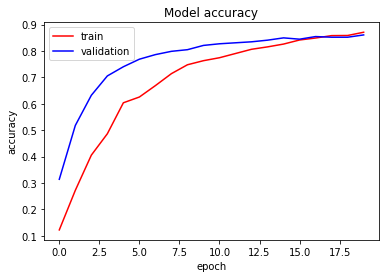

In [16]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.savefig('model1.png')
plt.show()

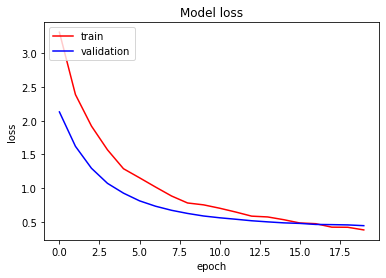

In [17]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('model1.png')
plt.show()

In [18]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.44667160511016846
Test accuracy: 0.8608695864677429


In [19]:
#saving model
model.save('model3.h5')

# TESTING IMAGE

In [20]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np


In [21]:
#LOAD MODEL
model = os.path.join('model3.h5')
model = tf.keras.models.load_model(model, custom_objects={'KerasLayer':hub.KerasLayer})

In [22]:
path = os.getcwd()
labels = []
dataset_path = os.path.join(path, 'dataset')
dataset_path = os.path.join(path, 'dataset')
imagePaths = paths.list_images(dataset_path)

for imagepath in imagePaths:
  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

labels_train_unique = np.unique(np.array(labels))

food = {}

for i in range(len(labels_train_unique)):
  food[labels_train_unique[i]] = i
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

d:\anaconda\envs\tfod\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


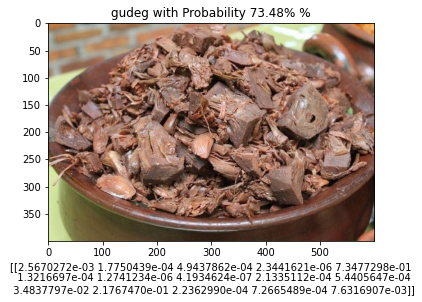

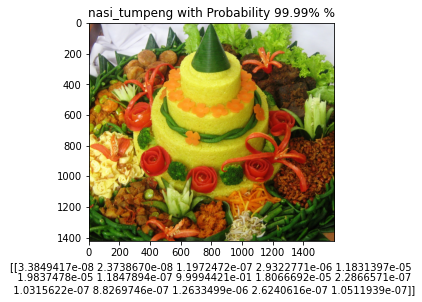

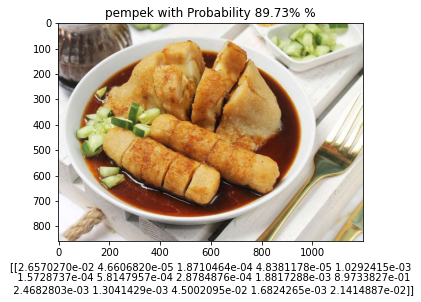

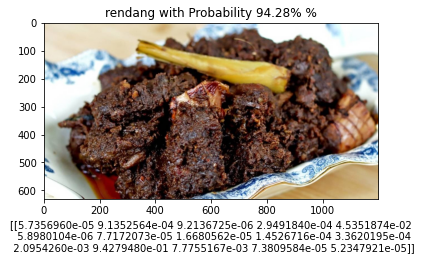

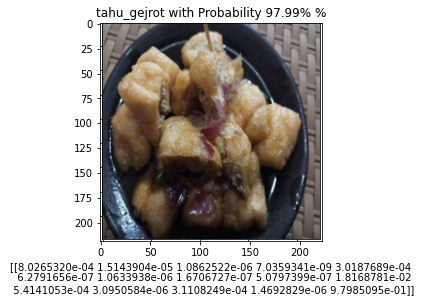

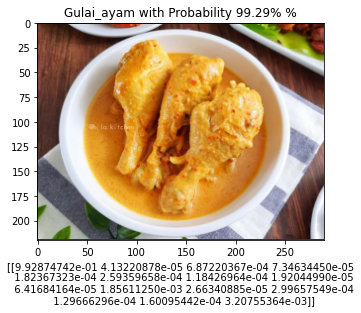

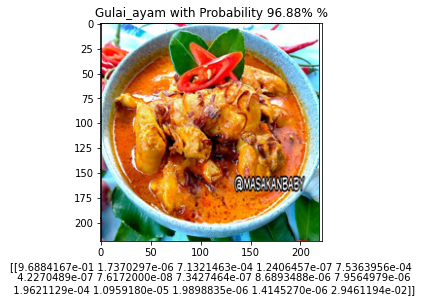

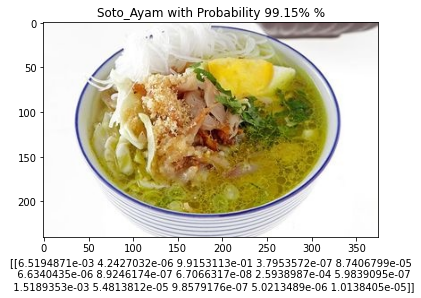

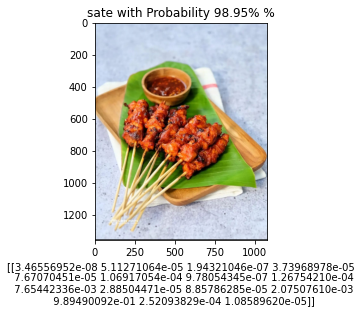

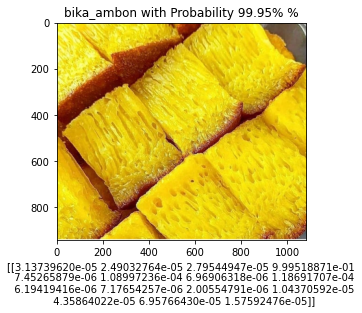

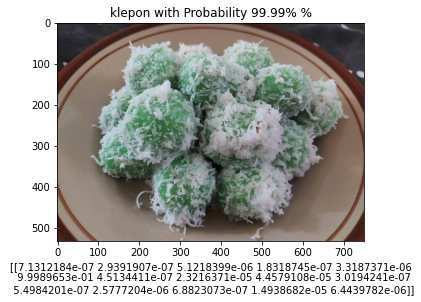

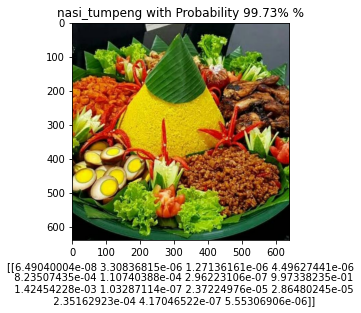

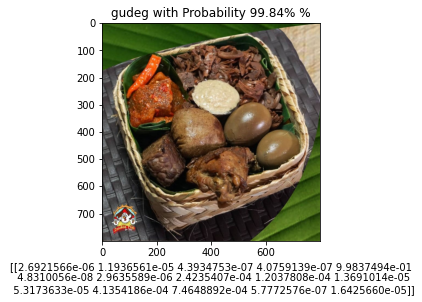

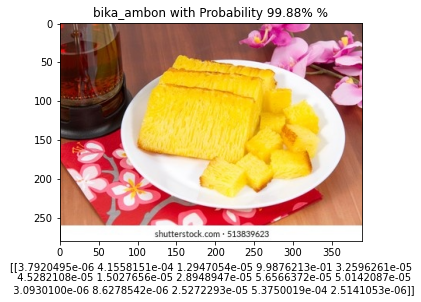

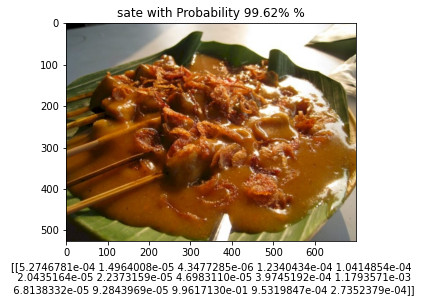

In [23]:
image_path = os.path.join(os.getcwd(), 'test_image')



for a in os.listdir (image_path):
    images = os.path.join(image_path, a)
    images = image.load_img(images, target_size=(224, 224))
    img = image.img_to_array(images)
    img = np.expand_dims(img, axis=0)
    processed_image = np.array(img, dtype='float') / 225.0
    pred = model.predict(processed_image)
 

    i = 0
    i_max=0
    max_val = ""

    for (k, result) in enumerate(food.keys()):

        if (pred[i][k] > i_max):
            i_max = pred[i][k]
            max_val = result

        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"

    gambar = mpimg.imread(os.path.join(image_path, a))
    plt.figure()
    plt.imshow(gambar)
    plt.title(txt)
    plt.xlabel(pred)

# CONVERT TO TFLITE

In [24]:
import os
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
model_path = tf.keras.models.load_model(os.path.join(os.getcwd(), 'model3.h5'), custom_objects={'KerasLayer':hub.KerasLayer})

converter = tf.lite.TFLiteConverter.from_keras_model(model_path)
tflite_model = converter.convert()

open('model.tflite', 'wb').write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\angga\AppData\Local\Temp\tmpxv9ag8wp\assets


INFO:tensorflow:Assets written to: C:\Users\angga\AppData\Local\Temp\tmpxv9ag8wp\assets


14518096

# TESTING TFLITE MODEL

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import cv2
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [33]:
path = os.getcwd()
labels = []
dataset_path = os.path.join(path, 'dataset')
dataset_path = os.path.join(path, 'dataset')
imagePaths = paths.list_images(dataset_path)

for imagepath in imagePaths:
  label = imagepath.split(os.path.sep)[-2]
  labels.append(label)

labels_train_unique = np.unique(np.array(labels))

food = {}

for i in range(len(labels_train_unique)):
  food[labels_train_unique[i]] = i
food

{'Gulai_ayam': 0,
 'Kerak_telor': 1,
 'Soto_Ayam': 2,
 'bika_ambon': 3,
 'gudeg': 4,
 'klepon': 5,
 'martabak': 6,
 'nasi_tumpeng': 7,
 'pecel': 8,
 'pempek': 9,
 'rawon': 10,
 'rendang': 11,
 'sate': 12,
 'serabi': 13,
 'tahu_gejrot': 14}

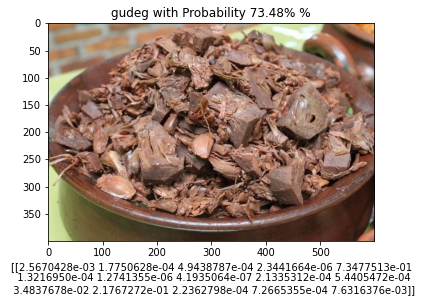

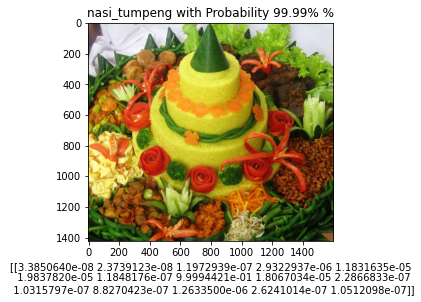

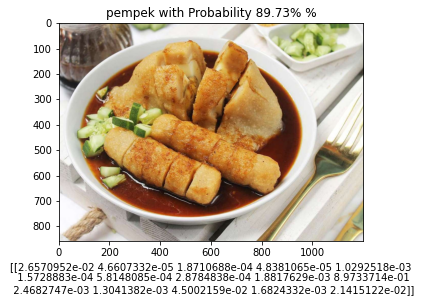

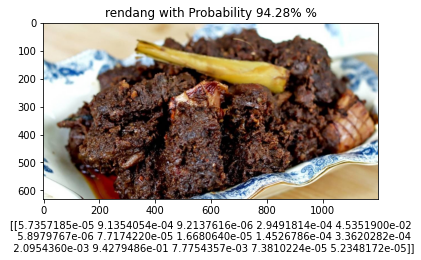

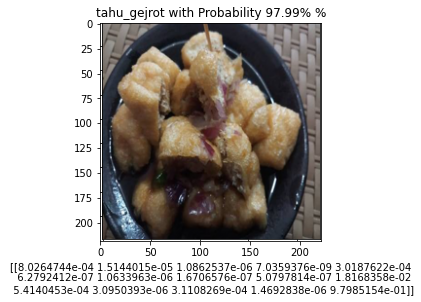

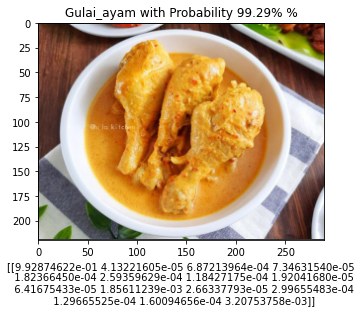

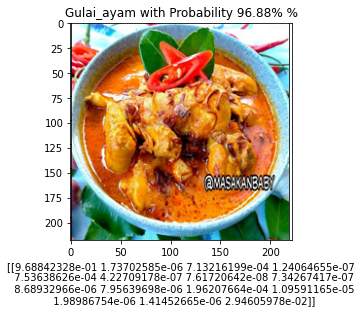

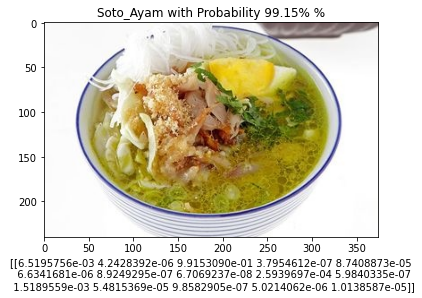

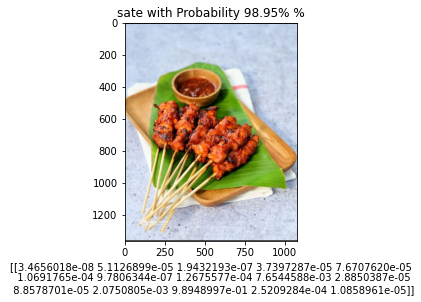

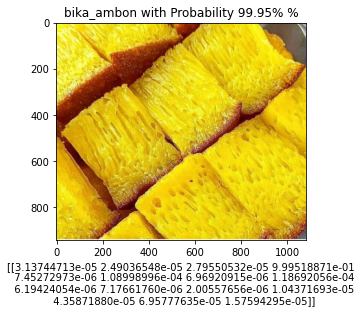

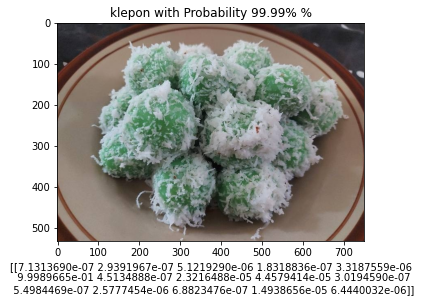

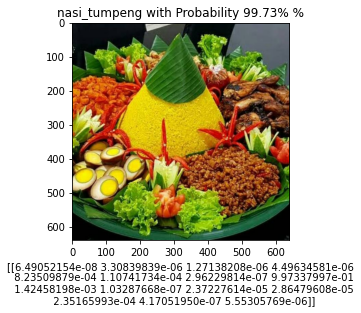

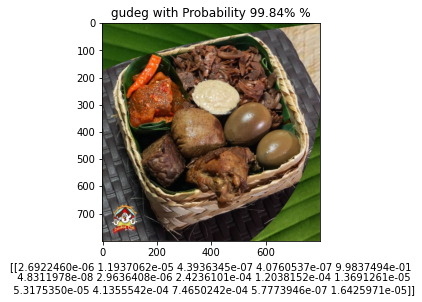

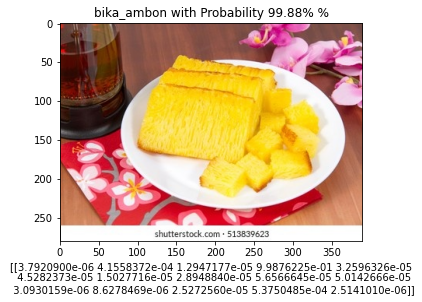

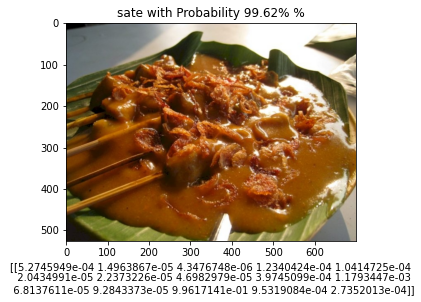

In [35]:
image_path = os.path.join(os.getcwd(), 'test_image')

for a in os.listdir (image_path):
    images = os.path.join(image_path, a)
    images = image.load_img(images, target_size=(224, 224))
    img = image.img_to_array(images)
    img = np.expand_dims(img, axis=0)
    processed_image = np.array(img, dtype='float32') / 225.0

    #load tflite
    interpreter = tf.lite.Interpreter(model_path='model.tflite')
    interpreter.allocate_tensors()

    #input tensor
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #test the model
    input_shape = input_details[0]['shape']
    
    interpreter.set_tensor(input_details[0]['index'], processed_image)

    interpreter.invoke()

    
    output_data = interpreter.get_tensor(output_details[0]['index'])
    #print(output_data)

    i = 0
    i_max=-1
    max_val = ""

    for (k, result) in enumerate(food.keys()):

        if (output_data[i][k] > i_max):
            i_max = output_data[i][k]
            max_val = result

        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
    
    #print(txt)
    gambar = mpimg.imread(os.path.join(image_path, a))
    plt.figure()
    plt.imshow(gambar)
    plt.title(txt)
    plt.xlabel(output_data)


# CONVERT TO TFJS

In [16]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import tensorflowjs as tfjs

In [19]:
model_path = tf.keras.models.load_model(os.path.join(os.getcwd(), 'model3.h5'), custom_objects={'KerasLayer':hub.KerasLayer})
tfjs.converters.save_keras_model(model_path, 'modelstfjs')